#Telecom X - Análisis de Evasión de Clientes


Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

Churn: si el cliente dejó o no la empresa. Relevante para la determinacion de los motivos del abandono.

Principalmente se analizaran el churn, medio de pago, costo total, ternure, servicio de internet, y tipo de contrato.



## Carga de datos

In [387]:
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()
df = pd.json_normalize(data)



## Inspeccion inicial del dataset

In [388]:
print(df.dtypes)
print('------------------------------------------------------------------------------------ \n')
print(df.isnull().sum())
print('------------------------------------------------------------------------------------ \n')
print(df.describe())
print('------------------------------------------------------------------------------------ \n')
print(df.info())
print('------------------------------------------------------------------------------------ \n')

df[df['account.Charges.Total'] == ' ']


customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object
------------------------------------------------------------------------------------ 

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


- No se encontraron valores nulos.
- Se identificaron valores vacios (" ") en la columna account.Charges.Total.
- Hay columnas numericas que tienen object como dtype y variables categoricas representadas como texto.

Posteriormente se realizara:

1- Normalizacion de datos.

2- Codificacion de variables binarias.

3- Renombrado de columnas.

## Limpieza y preparación de datos

### Normalización de valores faltantes

Se encontraron 11 valores vacíos en TotalCharges correspondientes a clientes con tenure = 0. Dado que estos clientes aún no han generado cargos efectivos, se imputara el valor 0 para evitar sesgos en el análisis posterior

In [389]:
filtro_account_charges_total = df['account.Charges.Total'] == ' '
df.loc[filtro_account_charges_total, 'account.Charges.Total'] = 0
df['account.Charges.Total']= df['account.Charges.Total'].astype(float)
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


### Conversión de tipos

Se realizara el pase de Yes y No, de cada variable categorica a 1 y 0 respectivamente para facilitar el posterior analisis.

#### Churm

In [390]:
df['Churn'] = (df['Churn'] == 'Yes').astype(int)
df['Churn'].value_counts()

,count
Churn,
0,5398
1,1869


###customer.Dependents

In [391]:
df['customer.Dependents']
df['customer.Dependents'] = (df['customer.Dependents'] == 'Yes').astype(int)
df['customer.Dependents'].value_counts()

,count
customer.Dependents,
0,5086
1,2181


###customer.Partner

In [392]:
df['customer.Partner']
df['customer.Partner'] = (df['customer.Partner'] == 'Yes').astype(int)
df['customer.Partner'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   int64  
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   int64  
 5   customer.Dependents        7267 non-null   int64  
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

###Renombrado de columnas

In [393]:
df.columns = [
    'Id_cliente',
    'Abandono',
    'Genero',
    'Jubilado',
    'Tiene_pareja',
    'Tiene_dependientes',
    'Meses_antiguedad',
    'Servicio_telefono',
    'Lineas_multiples',
    'Tipo_internet',
    'Seguridad_online',
    'Respaldo_online',
    'Proteccion_dispositivo',
    'Soporte_tecnico',
    'Streaming_tv',
    'Streaming_peliculas',
    'Tipo_contrato',
    'Factura_sin_papel',
    'Metodo_pago',
    'Cargo_mensual',
    'Cargo_total'
]
df

,Id_cliente,Abandono,Genero,Jubilado,Tiene_pareja,Tiene_dependientes,Meses_antiguedad,Servicio_telefono,Lineas_multiples,Tipo_internet,...,Respaldo_online,Proteccion_dispositivo,Soporte_tecnico,Streaming_tv,Streaming_peliculas,Tipo_contrato,Factura_sin_papel,Metodo_pago,Cargo_mensual,Cargo_total
0,0002-ORFBO,0,Female,0,1,1,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,0,1,0,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,0,0,0,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,1,1,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


###Crear Columna Cuentas_Diarias

In [394]:
df['Cuentas_Diarias']= (df['Cargo_total']/30).round(2)
df

,Id_cliente,Abandono,Genero,Jubilado,Tiene_pareja,Tiene_dependientes,Meses_antiguedad,Servicio_telefono,Lineas_multiples,Tipo_internet,...,Proteccion_dispositivo,Soporte_tecnico,Streaming_tv,Streaming_peliculas,Tipo_contrato,Factura_sin_papel,Metodo_pago,Cargo_mensual,Cargo_total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,19.78
1,0003-MKNFE,0,Male,0,0,0,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,18.08
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,9.36
3,0011-IGKFF,1,Male,1,1,0,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,41.26
4,0013-EXCHZ,1,Female,1,1,0,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,8.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,24.76
7263,9992-RRAMN,1,Male,0,1,0,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,62.46
7264,9992-UJOEL,0,Male,0,0,0,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,3.09
7265,9993-LHIEB,0,Male,0,1,1,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,154.26


## Análisis Exploratorio de Datos

###Análisis general del churn

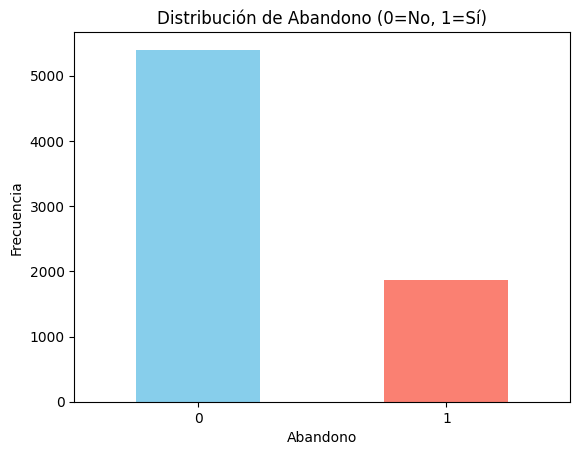

,count
Abandono,
0,5398
1,1869


In [395]:
conteo = df['Abandono'].value_counts().sort_index()
conteo.plot.bar(color=['skyblue', 'salmon'], title='Distribución de Abandono (0=No, 1=Sí)')
plt.xlabel('Abandono')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()


Del total de clientes (7267) hay 1869 abandonos, que aproximadamente equivaldria al 25,72. Esto supone una grave fuga de clientes.

#Dataframe abandonos

In [396]:
df_abandonos=df[df['Abandono']==True].copy()
df_abandonos.value_counts().sort_values(ascending=False)
df_abandonos.drop(columns=['Id_cliente','Abandono'],inplace=True)
print(df_abandonos['Tipo_contrato'].value_counts())
print("\n -------------------------------------------------")
print(df_abandonos['Meses_antiguedad'].value_counts())
print("Se encontro una fuga enorme antes de los primeros 6 meses de contrato del usuario")
print("\n")
print(df_abandonos['Meses_antiguedad'].mean())
print("\n")
print(" MEDIA MUCHO MAS BAJA QUE EN EL DATAFRAME DE CLIENTES QUE NO ABANDONARON EL SERVICIO: \n MEDIA DE ANTIGUEDAD ABANDONOS: \n 19.43\n MEDIA DE ANTIGUEDAD DE NO ABANDONOS:\n 37.56")
print("\n -------------------------------------------------")
print("Contratos con mas abandonos: Month-to-month\nCon menos abandonos: Month-to-month ")
print(df_abandonos['Metodo_pago'].value_counts())
print("\n migrar a los usuarios que pagen con Electronic check a otro medio de pago podria ayudar")
print("\n -------------------------------------------------")
print(df_abandonos['Tipo_internet'].value_counts())
print("Fibra Optica presenta mas del doble de abandonos de DSL, puede ser un problema tecnico")
print("\n -------------------------------------------------")
abandonos_internet = df_abandonos['Tipo_internet'].value_counts()
total_internet = df['Tipo_internet'].value_counts()

riesgo_internet = (abandonos_internet / total_internet) * 100
print(f"El riesgo de abandono por servicio de internet es de: \n{riesgo_internet.sort_values(ascending=False)}")

print("\n -------------------------------------------------")
abandonos_medio_pago = df_abandonos['Metodo_pago'].value_counts()
total_medio_pago = df['Metodo_pago'].value_counts()

riesgo_medio_pago = (abandonos_medio_pago/ total_medio_pago) * 100
print(f"El riesgo de abandono por tipo de contrato es de: \n{riesgo_medio_pago.sort_values(ascending=False)}")
print("\n -------------------------------------------------")
abandonos_contratos = df_abandonos['Tipo_contrato'].value_counts()
total_contratos = df['Tipo_contrato'].value_counts()

riesgo_contratos = (abandonos_contratos / total_contratos) * 100
print(f"El riesgo de abandono por tipo de contrato es de: \n{riesgo_contratos.sort_values(ascending=False)}")
print("\n -------------------------------------------------")
print("En resumen seria recomendable buscar contratos de 2 años (menor riesgo de abandono), incentivar cambiar el medio de pago de Electronic check (mas riesgoso) a Credit card (automatic), y revisar el servicio de fibra optica.")

Tipo_contrato
Month-to-month    1655
One year           166
Two year            48
Name: count, dtype: int64

 -------------------------------------------------
Meses_antiguedad
1     380
2     123
3      94
4      83
5      64
     ... 
72      6
44      6
62      5
64      4
63      4
Name: count, Length: 72, dtype: int64
Se encontro una fuga enorme antes de los primeros 6 meses de contrato del usuario


17.979133226324237


 MEDIA MUCHO MAS BAJA QUE EN EL DATAFRAME DE CLIENTES QUE NO ABANDONARON EL SERVICIO: 
 MEDIA DE ANTIGUEDAD ABANDONOS: 
 19.43
 MEDIA DE ANTIGUEDAD DE NO ABANDONOS:
 37.56

 -------------------------------------------------
Contratos con mas abandonos: Month-to-month
Con menos abandonos: Month-to-month 
Metodo_pago
Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: count, dtype: int64

 migrar a los usuarios que pagen con Electronic check a otro medio de pago podria ayudar


#Dataframe clientes que no abandonaron

In [397]:
df_clientes=df[df['Abandono']==False].copy()
df_clientes.value_counts().sort_values(ascending=False)
df_clientes.drop(columns=['Id_cliente','Abandono'],inplace=True)
print(df_clientes['Tipo_contrato'].value_counts())
print("\n -------------------------------------------------")
print(df_clientes['Meses_antiguedad'].value_counts())
print("\n -------------------------------------------------")
print(df_clientes['Meses_antiguedad'].mean())
print("\n -------------------------------------------------")
print(df_clientes['Metodo_pago'].value_counts())
print("\n -------------------------------------------------")
print(df_clientes['Tipo_internet'].value_counts())
df_clientes.info()


Tipo_contrato
Month-to-month    2350
Two year          1695
One year          1353
Name: count, dtype: int64

 -------------------------------------------------
Meses_antiguedad
72    363
1     254
71    170
2     123
3     113
     ... 
38     47
21     47
39     45
36     40
0      11
Name: count, Length: 73, dtype: int64

 -------------------------------------------------
37.321044831419044

 -------------------------------------------------
Metodo_pago
Electronic check             1374
Mailed check                 1357
Credit card (automatic)      1336
Bank transfer (automatic)    1331
Name: count, dtype: int64

 -------------------------------------------------
Tipo_internet
DSL            2029
Fiber optic    1901
No             1468
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 5398 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Genero      

#PENDIENTES
- AGRUPAR TERNURE EN RANGOS
- COMPARAR DF ABANDONO Y NO ABANDONO EN GRAFICO
- YA REVISE PROPORCIONES
- BORRAR LOS PRINT O ACOMODARLOS
- UNIFICAR ANALISIS
- Revisar intro
- Crear Tablas estilizadas

- Seccion de calculo media, mediana y desviacion estandar
- Graficos para churn (cambiar conteo por proporcion)
- Revisar y graficar cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras
- Graficos para variables numericas y evasion
- INFORME FINAL
- Análisis de correlación entre variables (Funcion corr)
- README


# INFORME FINAL

Finaliza el desafío elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:

🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

Asegúrate de que el informe esté bien estructurado, claro y respaldado por visualizaciones que refuercen tus conclusiones. 🚀

In [398]:
df.describe()

,Abandono,Jubilado,Tiene_pareja,Tiene_dependientes,Meses_antiguedad,Cargo_mensual,Cargo_total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,64.720098,2277.182035,75.906122
std,0.437115,0.369074,0.499782,0.458343,24.571773,30.129572,2268.648587,75.621620
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,35.425000,396.200000,13.205000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,70.300000,1389.200000,46.310000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,89.875000,3778.525000,125.950000
max,1.000000,1.000000,1.000000,1.000000,72.000000,118.750000,8684.800000,289.490000
